### 財政部
#####https://www.einvoice.nat.gov.tw/APCONSUMER/BTC501W/

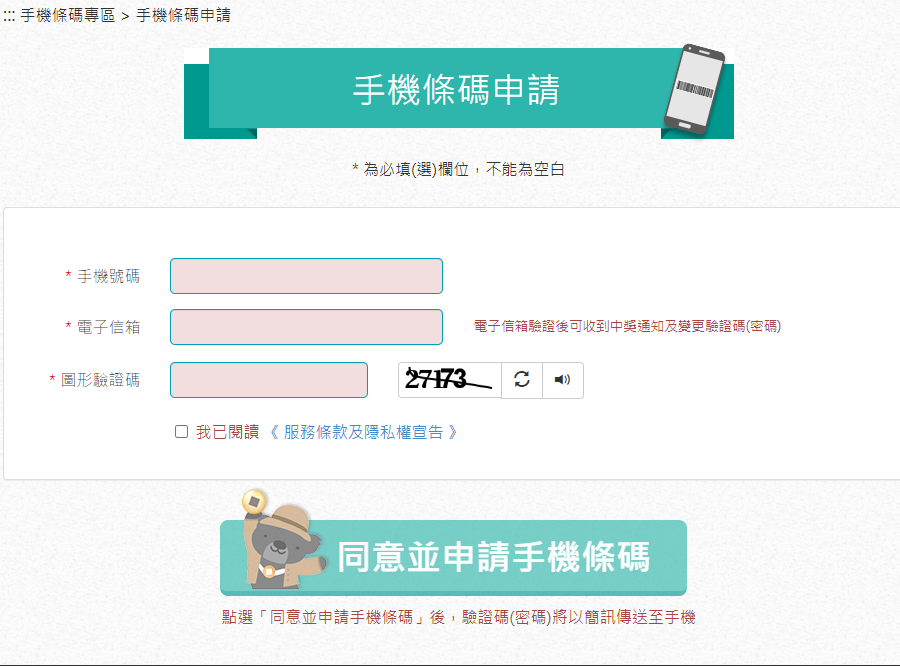
)


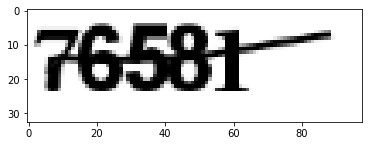

In [1817]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

image = cv2.imread('/content/驗證碼.png')
plt.imshow(image)

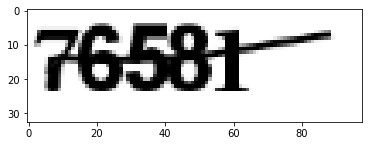

In [1818]:
denois = cv2.fastNlMeansDenoising(image)
plt.imshow(denois)

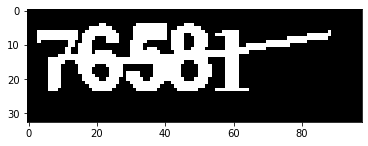

In [1819]:
ret,thresh = cv2.threshold(denois,127,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh)

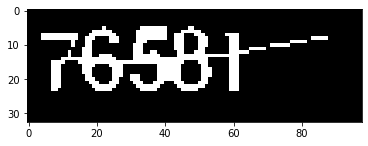

In [1820]:
kernel = np.ones((2,2),np.uint8)
erode = cv2.erode(thresh,kernel,iterations = 1)
plt.imshow(erode)

In [1821]:
thresh = erode

In [1822]:
img_arr = cv2.cvtColor(thresh,cv2.COLOR_BGR2GRAY)
img_arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [1823]:
img_arr.shape

(33, 98)

In [1824]:
img_arr[:,26:65] = 0
img_arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [1825]:
from sklearn.preprocessing import binarize
imgdata = np.where(img_arr == 255)
imgdata

(array([ 5,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
         7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,
         8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,
         9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11,
        11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13,
        13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
        15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16,
        16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18,
        18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20,
        21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22,
        22, 23, 23, 23, 23, 23, 23, 23]),
 array([22, 19, 20, 21, 22, 23, 24,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,
        14, 18, 19, 20, 21, 22, 23, 24, 25,  4,  5,  6,  7,  8,  9, 10, 11,
        12, 13, 14, 17, 18, 19, 24, 25, 83, 84

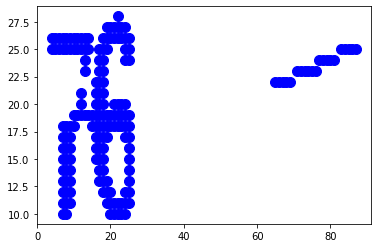

In [1826]:
plt.scatter(imgdata[1],33-imgdata[0],s=100,c='b')
plt.show()

In [1827]:
X = np.array([imgdata[1]])
y = 33 - imgdata[0]

In [1828]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree = 2)
X_ = poly_reg.fit_transform(X.T)
reg = LinearRegression()
reg.fit(X_,y)

LinearRegression()

In [1829]:
X2 = np.array([[i for i in range(0,98)]])
X2

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
        32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
        48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
        64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79,
        80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95,
        96, 97]])

In [1830]:
X2_ = poly_reg.fit_transform(X2.T)

Populating the interactive namespace from numpy and matplotlib


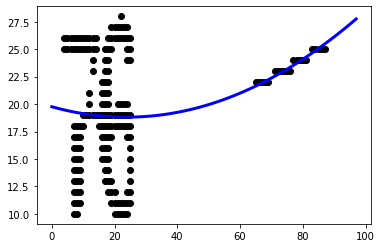

In [1831]:
%pylab inline
plt.scatter(X,y, color = 'black')
plt.plot(X2.T,reg.predict(X2_),color='b',linewidth=3)

In [1832]:
print('coef: {}'.format(reg.coef_))
print('intercept: {}'.format(reg.intercept_))

coef: [ 0.         -0.07962661  0.00167047]
intercept: 19.76086358454576


In [1833]:
newimg = img_arr.copy()

In [1834]:
reg.predict(X2_).round(0)

array([20., 20., 20., 20., 19., 19., 19., 19., 19., 19., 19., 19., 19.,
       19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19.,
       19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19.,
       19., 19., 19., 19., 19., 19., 20., 20., 20., 20., 20., 20., 20.,
       20., 20., 20., 20., 21., 21., 21., 21., 21., 21., 21., 21., 22.,
       22., 22., 22., 22., 22., 22., 23., 23., 23., 23., 23., 23., 24.,
       24., 24., 24., 24., 24., 25., 25., 25., 25., 25., 26., 26., 26.,
       26., 27., 27., 27., 27., 28., 28.])

In [1835]:
X2

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
        32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
        48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
        64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79,
        80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95,
        96, 97]])

In [1836]:
X2[0]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97])

In [1837]:
newimg = cv2.cvtColor(thresh,cv2.COLOR_BGR2GRAY)

In [1838]:
for ele in np.column_stack([reg.predict(X2_).round(0),X2[0],] ):
    pos = 33-int(ele[0])
    newimg[pos-1:pos+1,int(ele[1])] = 0
    # newimg[pos-2:pos+2,int(ele[1])] = 255 - newimg[pos-2:pos+2,int(ele[1])]

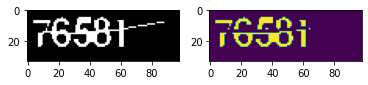

In [1839]:
plt.subplot(121)
plt.imshow(thresh)
plt.subplot(122)
plt.imshow(newimg)
plt.show()

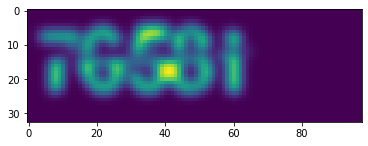

In [1862]:
blur = cv2.GaussianBlur(newimg,(9,9),0)
plt.imshow(blur)

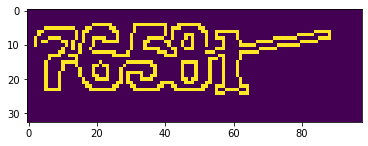

In [1864]:
canny = cv2.Canny(image,30,150)
plt.imshow(canny)

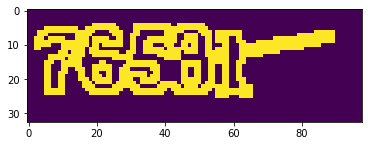

In [1866]:
nimg = cv2.dilate(canny,kernel,iterations=1)
plt.imshow(nimg)